In [135]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve,auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset 
data = pd.read_csv('Automobile_insurance_fraud.csv')
#Looking into first 5 rows
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
# display Maximum rows
pd.set_option('display.max.rows',None)

In [4]:
# Checking columns name
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
# Checking shape of dataset
data.shape

(1000, 40)

In [ ]:
# There are 1000 rows and 40 columns in datset

In [6]:
#Checking the datatype of each attribute
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [ ]:
# Identifing the type of Problem- Output: fraud_reported is object data so we use classification models

In [7]:
#removing duplicate values
data.drop_duplicates(inplace = True)

In [8]:
# Checking  shape After removing Duplicated
data.shape

(1000, 40)

In [ ]:
# There is no duplicates present in datset

In [9]:
# Checking Null values of each attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [ ]:
# There is no null value present.

In [13]:
# Checking missing values of each attributes
data.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [ ]:
#  _c39 feature have only nan so we drop it

In [14]:
data.drop('_c39', axis = 1,inplace = True)

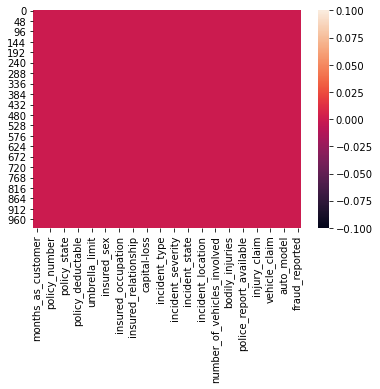

In [15]:
#Looking for missing value
sns.heatmap(data.isna())
plt.show()

In [16]:
#There is missing  value present in dataset

In [17]:
# Checking statistics summary
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


In [36]:
#Checking for ? values in dataset
data.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [50]:
print('collision_type\n',data['collision_type'].value_counts())
print('property_damage\n',data['property_damage'].value_counts())
print('police_report_available\n',data['police_report_available'].value_counts())


collision_type
 Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
property_damage
 NO     698
YES    302
Name: property_damage, dtype: int64
police_report_available
 NO     686
YES    314
Name: police_report_available, dtype: int64


In [45]:
data['property_damage']=data['property_damage'].replace('?', data['property_damage'].mode()[0])

In [49]:
data['property_damage']=data['property_damage'].replace('?', 'NO')
data['police_report_available']=data['police_report_available'].replace('?', 'NO')

In [18]:
#Few columns have too much difference in mean, median and std.

In [20]:
data['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

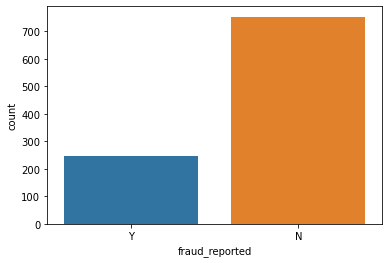

In [21]:
sns.countplot(data['fraud_reported'])
plt.show()

In [ ]:
# Insurance Fraud happend very less
# Also we see class imbalance

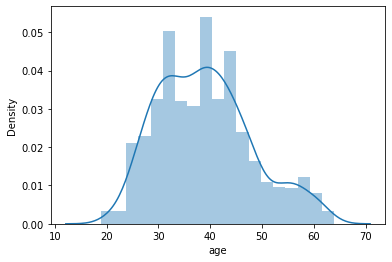

In [30]:
sns.distplot(data['age'])
plt.show()

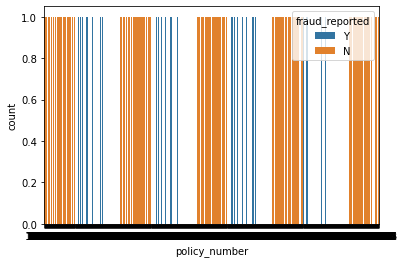

In [33]:
sns.countplot(data['policy_number'],hue=data['fraud_reported'])
plt.show()

In [ ]:
#Insurance Fraud happend very less

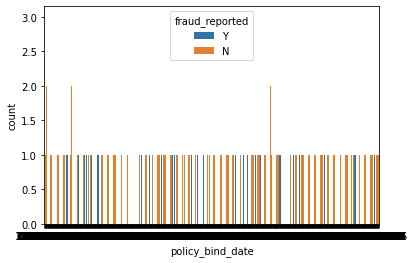

In [34]:
sns.countplot(data['policy_bind_date'],hue=data['fraud_reported'])
plt.show()

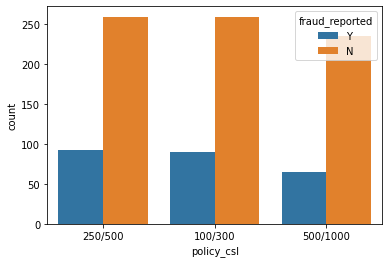

In [35]:
sns.countplot(data['policy_csl'])
plt.show()

In [ ]:
#Policy_csl is 250/500 and 100/300 is high where as 500/1000 is less.

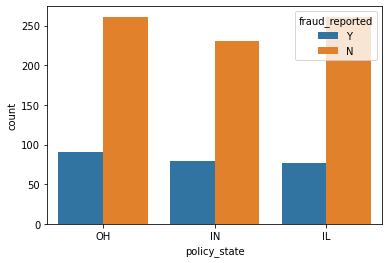

In [54]:
sns.countplot(data['policy_state'],hue=data['fraud_reported'])
plt.show()

In [ ]:
# Policy_state is high in OH and IL where as low in IN.

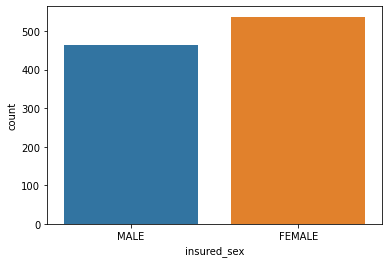

In [55]:
sns.countplot(data['insured_sex'])
plt.show()

In [ ]:
#Female applied for Insurance more than Male.

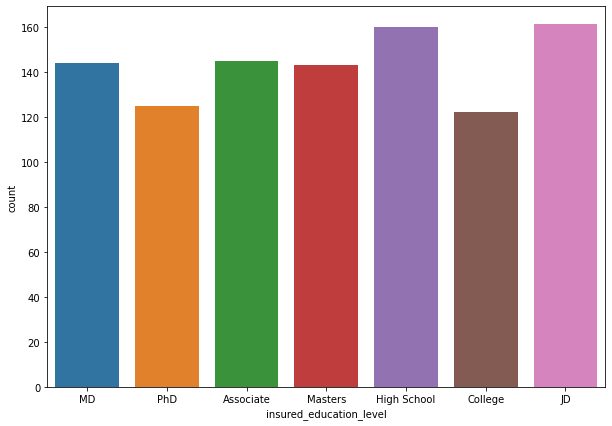

In [59]:
plt.figure(figsize=(10,7),facecolor = 'white')
sns.countplot(data['insured_education_level'])
plt.show()

In [ ]:
#Mosty insured person have education level High School and JD.

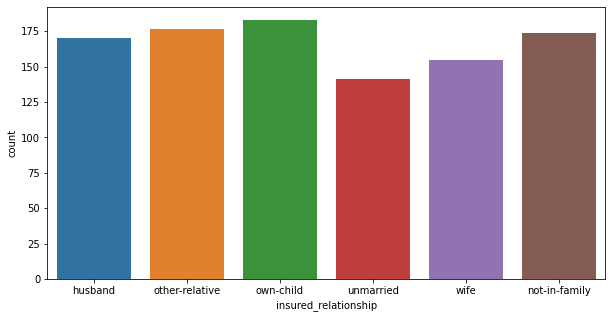

In [61]:
plt.figure(figsize=(10,5),facecolor = 'white')
sns.countplot(data['insured_relationship'])
plt.show()

In [62]:
#The person who have child,otherrelatives those peoples did insurances more.

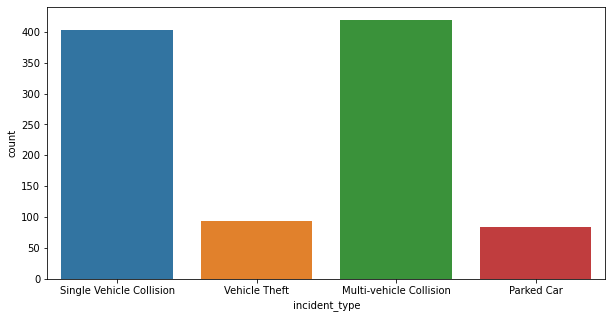

In [65]:
plt.figure(figsize=(10,5),facecolor = 'white')
sns.countplot(data['incident_type'])
plt.show()

In [ ]:
#Single Vehicle Collision and Multi vehicle Collision did insurances more

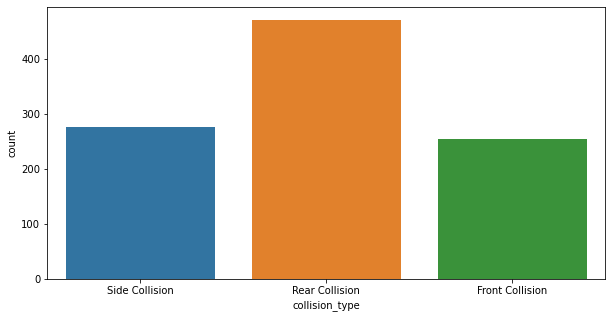

In [64]:
plt.figure(figsize=(10,5),facecolor = 'white')
sns.countplot(data['collision_type'])
plt.show()

In [ ]:
# Rear Collision is more than side and front collision .

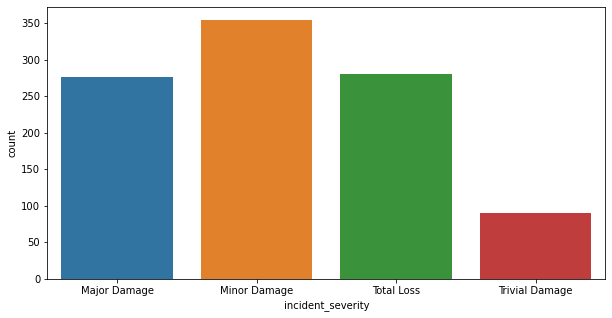

In [66]:
plt.figure(figsize=(10,5),facecolor = 'white')
sns.countplot(data['incident_severity'])
plt.show()

In [ ]:
#Minor Damages are happen more where as Trival Damages are less.

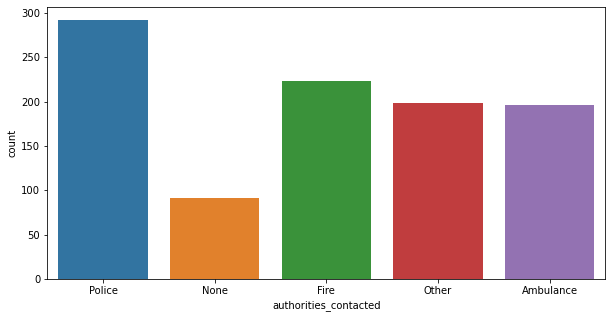

In [67]:
plt.figure(figsize=(10,5),facecolor = 'white')
sns.countplot(data['authorities_contacted'])
plt.show()

In [ ]:
#People contacted more to police and in very less conditions people didn't call to anyone.

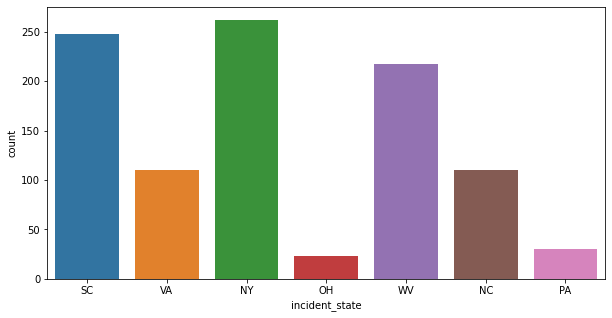

In [68]:
plt.figure(figsize=(10,5),facecolor = 'white')
sns.countplot(data['incident_state'])
plt.show()

In [69]:
#More incident happen in NY where as in OH very less incident happen.

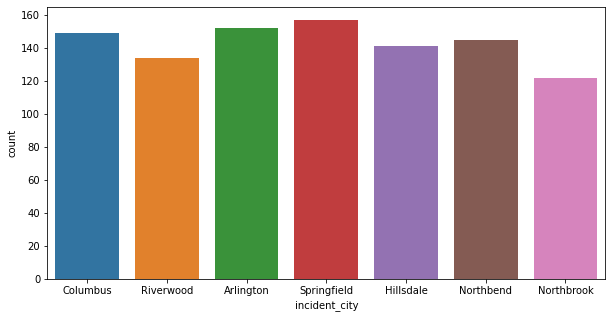

In [70]:
plt.figure(figsize=(10,5),facecolor = 'white')

sns.countplot(data['incident_city'])
plt.show()

In [ ]:
#springfield Incident_city has highest incident and other all cities have same number of incidents.

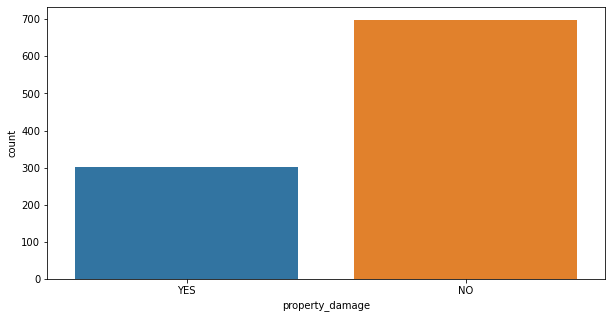

In [71]:
plt.figure(figsize=(10,5),facecolor = 'white')
sns.countplot(data['property_damage'])
plt.show()

In [ ]:
#Poperty damages are less.

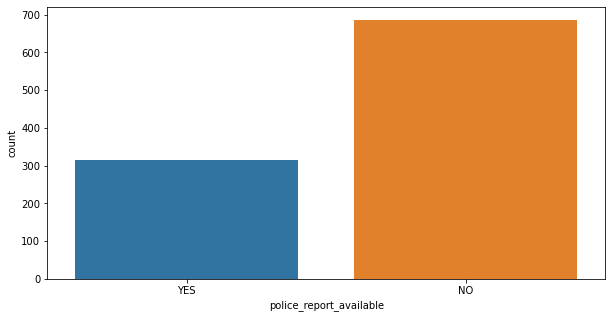

In [72]:
plt.figure(figsize=(10,5),facecolor = 'white')
sns.countplot(data['police_report_available'])
plt.show()

In [ ]:
#police_report_available are very less

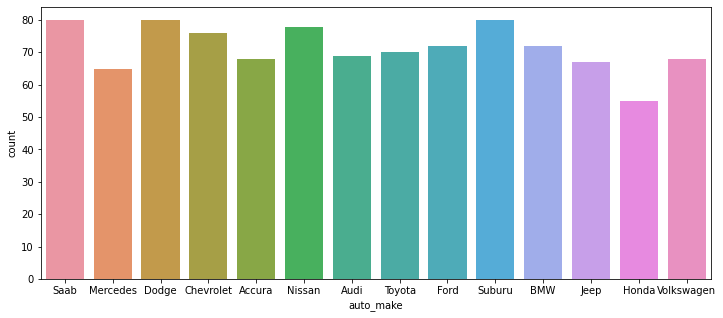

In [75]:
plt.figure(figsize=(12,5),facecolor = 'white')
sns.countplot(data['auto_make'])
plt.show()

In [ ]:
# Saab,Dodge,suburu

In [83]:
data['csl_per_person']=data.policy_csl.str.split('/',expand=True)[0]
data['csl_per_accident']=data.policy_csl.str.split('/',expand=True)[1]

In [85]:
#Checking for numerical attributes
data._get_numeric_data().columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')

In [92]:
# now we seperate object datatype
data_string_type=[]
for i in data.columns:
    if data[i].dtypes == "object":
        data_string_type.append(i)

In [93]:
# Now we convert object into numerical 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for columns in data_string_type:
    data[columns]=le.fit_transform(data[columns])

In [76]:
#Checking Correlation
cor = data.corr()

In [77]:
# we can understanding properly as we use heatmap to find correleation

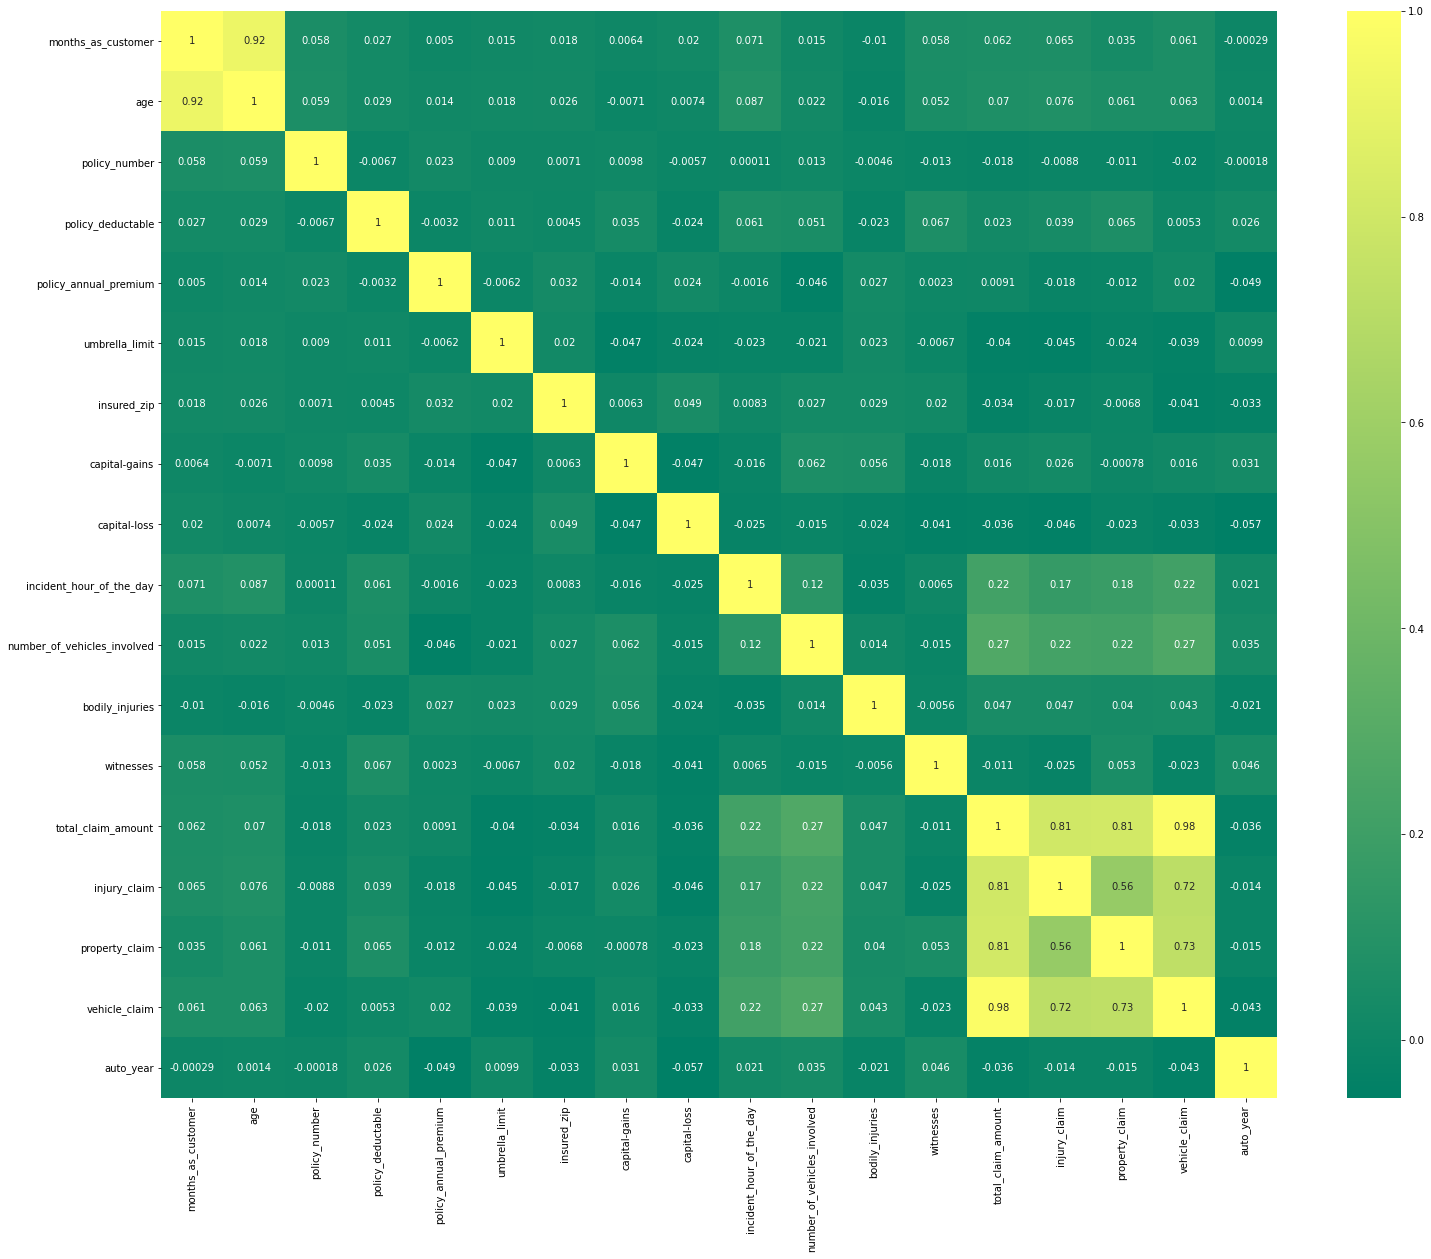

In [78]:
#Checking of correlation of features with each other
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(),cmap='summer',annot=True)
plt.show()

In [ ]:
# Monthly customer & age, total_claim_amount & injury_claim,propertycvlaim has strong correlationship

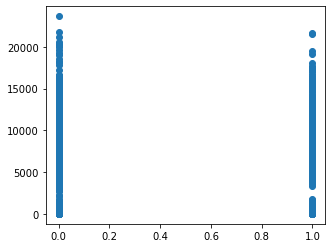

In [96]:
plt.figure(figsize =(5,4), facecolor ='white')
plt.scatter(data['property_damage'], data['property_claim'])
plt.show()

In [ ]:
# property_claim  people apply claim where property damage or not 

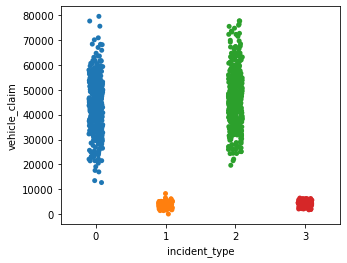

In [99]:
plt.figure(figsize =(5,4), facecolor ='white')
sns.stripplot(data['incident_type'], data['vehicle_claim'])
plt.show()

In [ ]:
#People do Vehicle claim when Single Vehicle Collision or Multi-vehicle Collision happen.

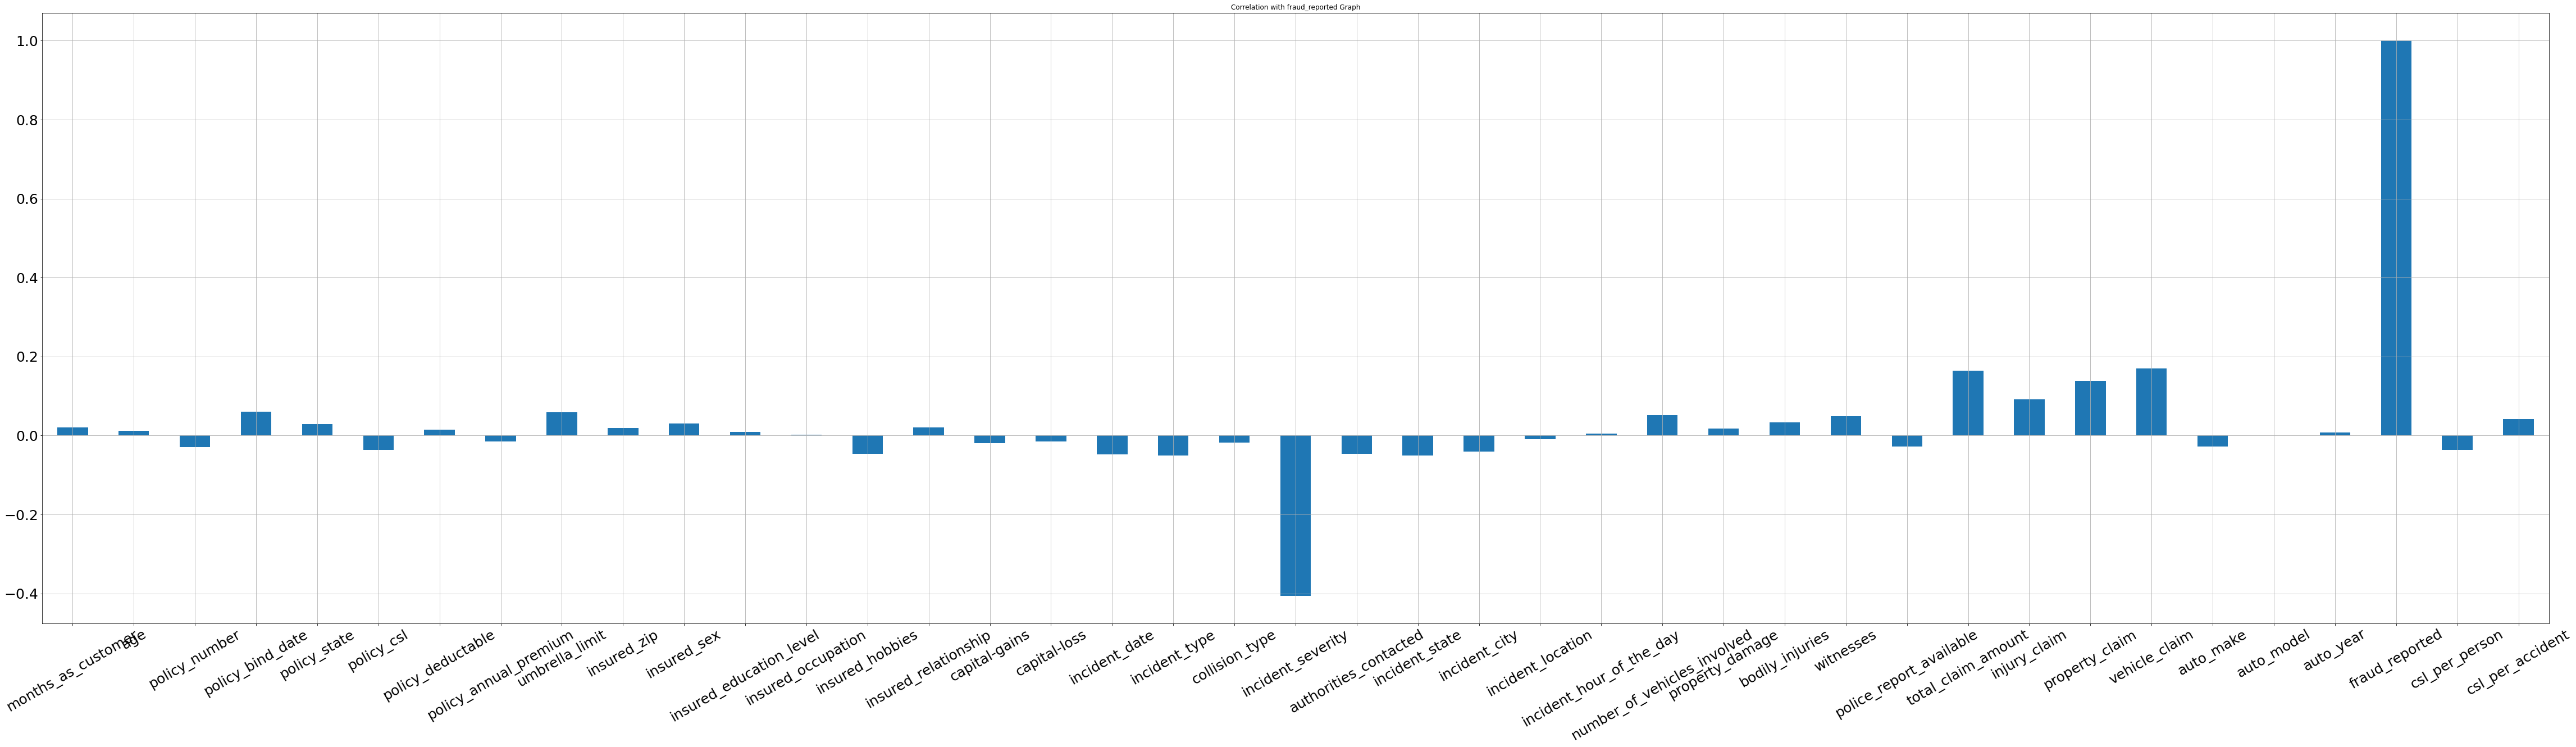

In [108]:
data.corrwith(data.fraud_reported).plot.bar(
        figsize = (80,20), title = "Correlation with fraud_reported Graph", fontsize = 25,rot = 30, grid = True)
plt.show()

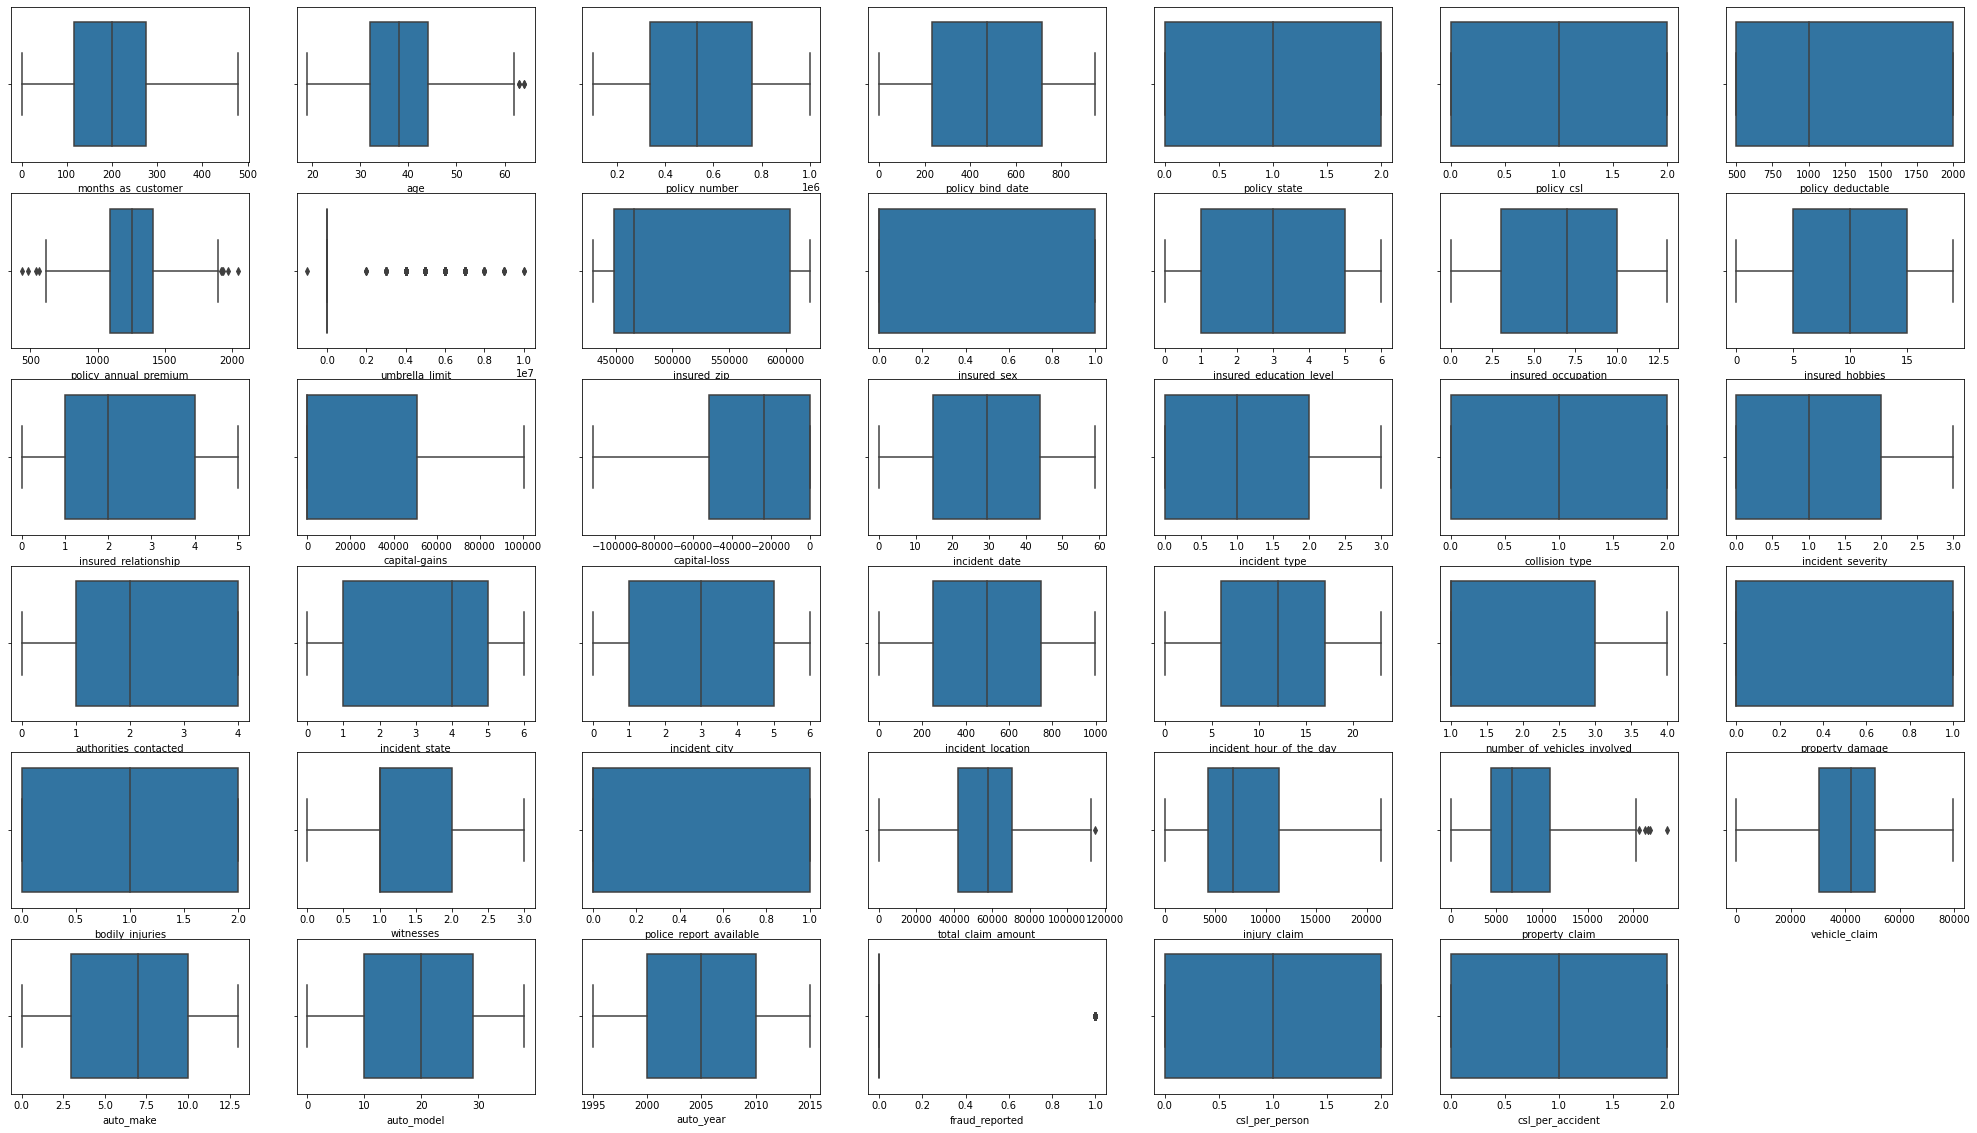

In [122]:
# Chekcing Outlier and skeweness
# let's see how data is distributed for every column
plt.figure(figsize=(35,20), facecolor='white')
plotnumber = 1

for columns in data:
    if plotnumber<=42 :     # as there are 42 columns in the data
        ax = plt.subplot(6,7,plotnumber)
        sns.boxplot(data[columns])
    plotnumber+=1
plt.show()

In [117]:
# we see that only few coloumn have outliers and skewness present in datatset

In [118]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.033682
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [119]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(data))
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8], dtype=int64))


In [120]:
threshold=3
new_data=data[(z<3).all(axis=1)]
print(new_data.shape)
print(data.shape)

(980, 41)
(1000, 41)


In [121]:
#checking for how much data we lost
loss_percent=(1000-980)/1000*100
print(loss_percent)

2.0


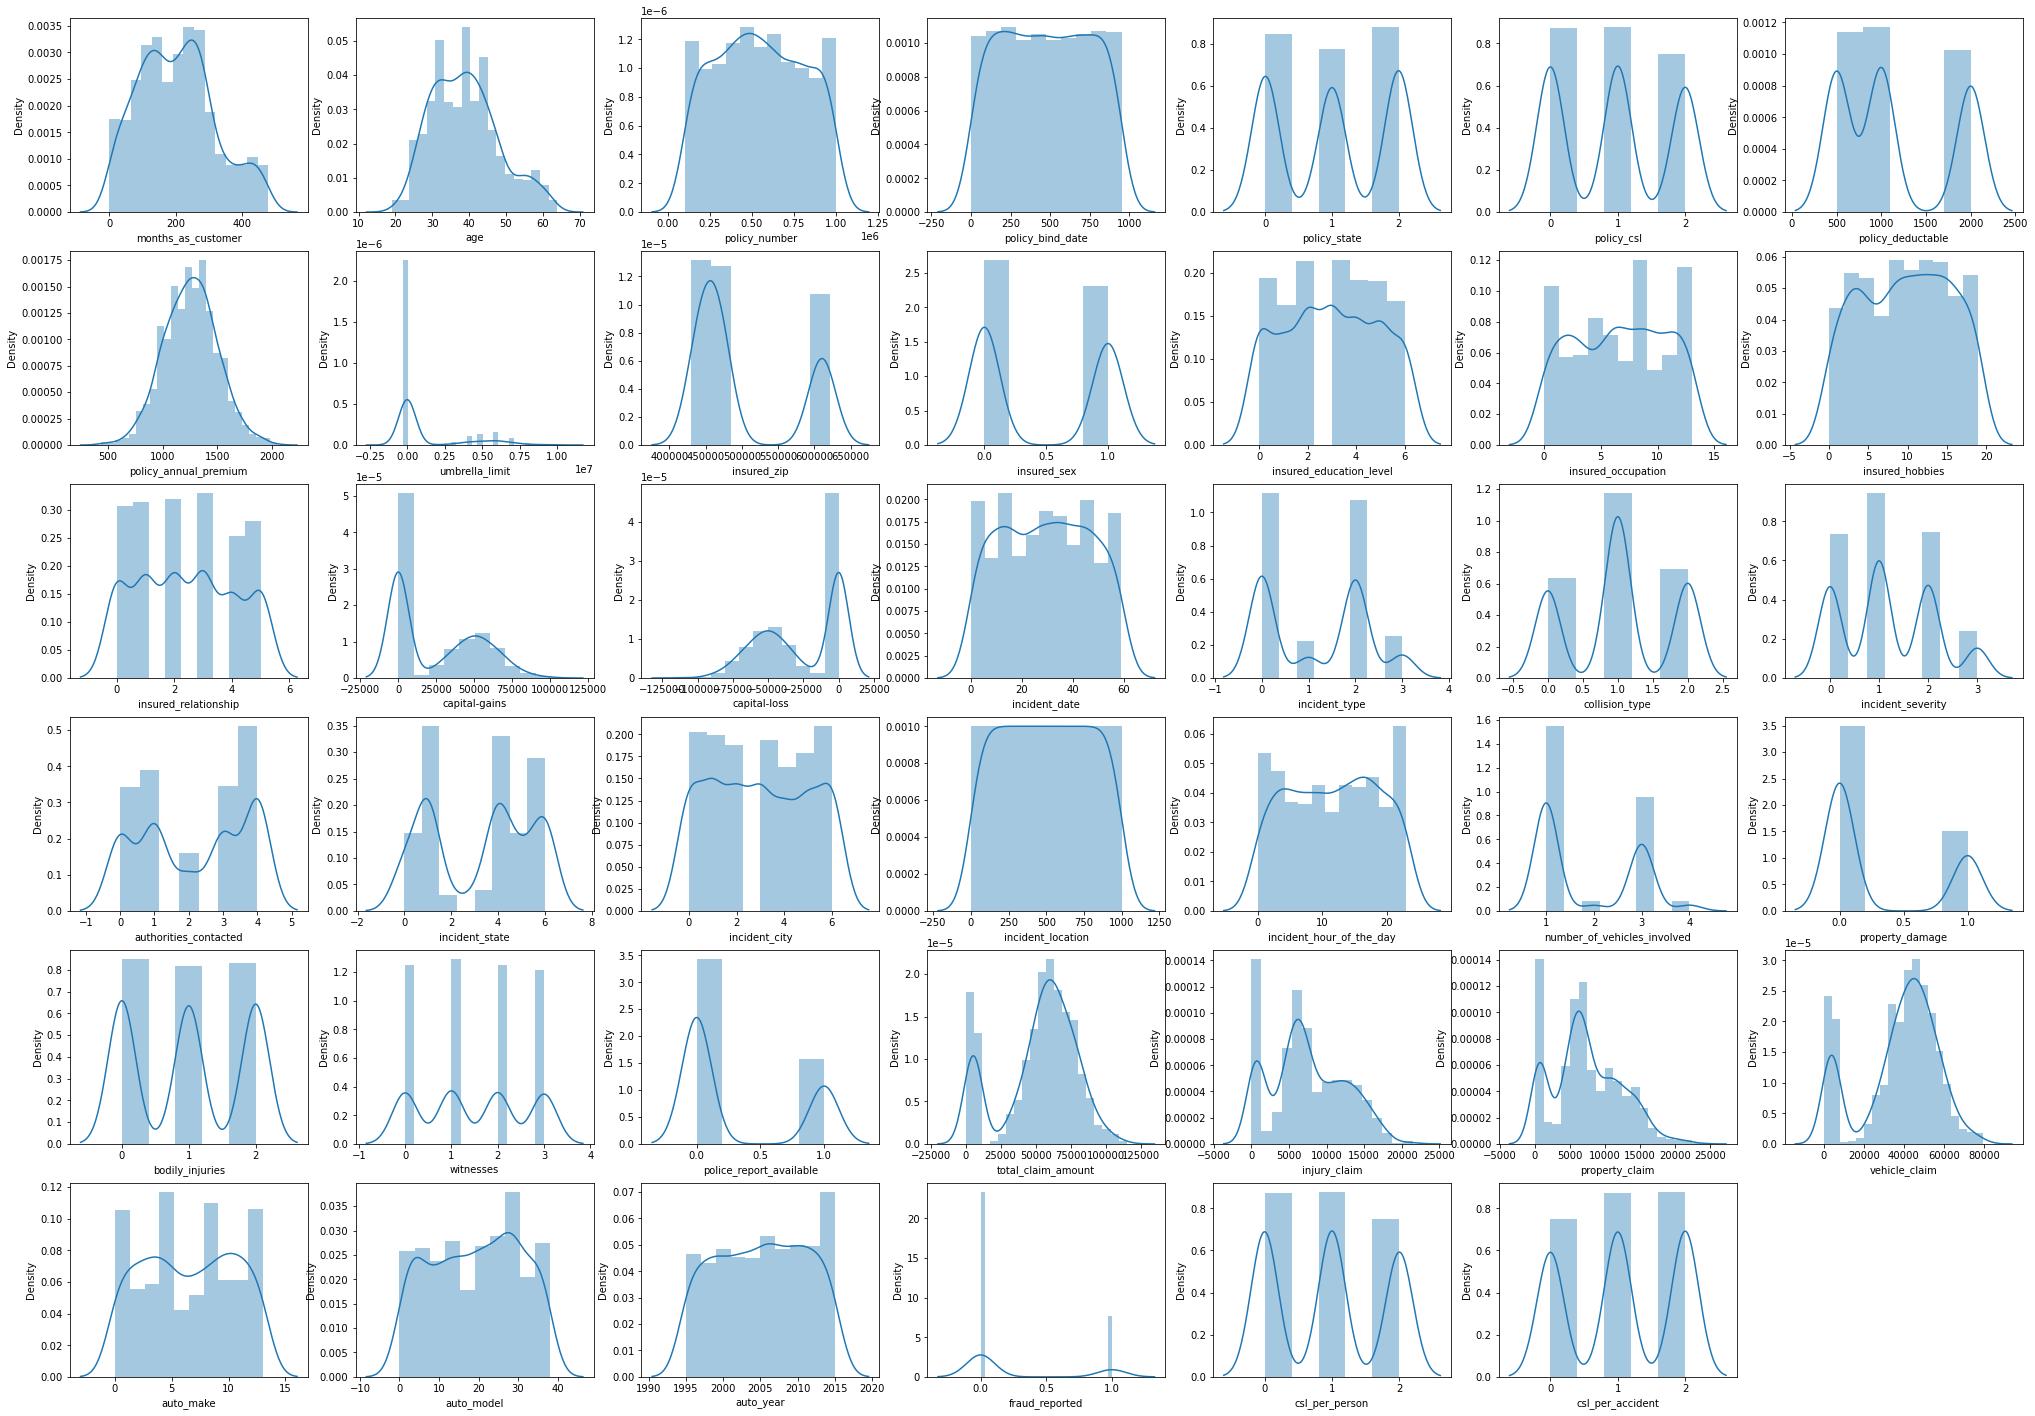

In [123]:
# let's see how data is distributed for every column
plt.figure(figsize=(35,25), facecolor='white')
plotnumber = 1

for columns in data:
    if plotnumber<=42 :     # as there are 42 columns in the data
        ax = plt.subplot(6,7,plotnumber)
        sns.distplot(data[columns])
    plotnumber+=1
plt.show()

In [124]:
#Checking skewness of all columns
new_data.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.032778
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369


In [125]:
# Let's split our dataset into Features and label
x=new_data.drop(columns=['fraud_reported'])
y=new_data['fraud_reported']

In [126]:
# Handiling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_over,y_over = sm.fit_resample(x,y)

In [127]:
from sklearn.preprocessing import StandardScaler
score =StandardScaler()
X_score = score.fit_transform(x_over)

In [128]:
# Apply Dimenision reduction technique
from sklearn.decomposition import PCA
pca =PCA()
pca.fit_transform(X_score)

array([[ 2.49940795e-01,  1.17200659e+00,  9.80947315e-01, ...,
         2.37790633e-02,  8.34760226e-07, -5.54431290e-16],
       [-4.17439515e+00, -8.26184090e-01,  4.88775501e-01, ...,
         1.03779494e-01,  3.03042925e-06,  8.32075859e-16],
       [-9.72083694e-01, -1.00544597e+00, -5.43083743e-01, ...,
        -3.35404690e-01, -8.55041368e-06,  1.81174998e-15],
       ...,
       [ 1.14565393e+00, -3.60159698e-02,  1.35465687e+00, ...,
        -2.27903994e-01, -1.38852828e-05, -3.35175593e-16],
       [ 3.20605757e-01, -2.63250581e-01,  1.31266366e+00, ...,
         9.56375396e-02,  2.10981459e-06,  1.42678415e-16],
       [ 3.31423554e+00, -6.17782312e-01,  2.63011056e+00, ...,
         3.57450655e-01, -2.32284442e-05,  4.59790349e-16]])

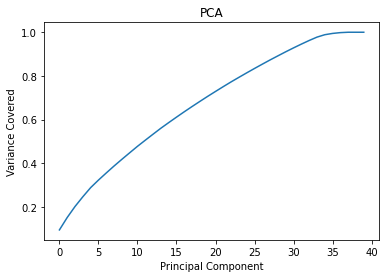

In [129]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Variance Covered')
plt.title("PCA")
plt.show()

In [132]:
pca=PCA(n_components=34)
new_pcomp=pca.fit_transform(X_score)
princi_comp=pd.DataFrame(new_pcomp,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34'])
princi_comp

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34
0,0.249941,1.172007,0.980947,-1.282225,3.284518,3.216334,0.529872,-1.554740,0.883351,0.176855,...,-0.430875,1.051402,-0.771376,-1.361196,-1.220468,-1.059601,-0.670315,0.407787,-0.390270,0.829110
1,-4.174395,-0.826184,0.488776,-1.122840,0.369614,-0.284892,0.392785,-1.036177,0.515781,1.051887,...,-1.440239,-0.002260,-0.228858,0.156613,0.817480,-0.350023,-1.345321,-0.492289,-0.262381,0.993569
2,-0.972084,-1.005446,-0.543084,1.759897,0.636223,-1.767112,1.092551,-0.167210,1.354958,-0.379931,...,-1.557695,-0.403725,-0.800474,-0.411096,1.294306,-0.329410,1.057752,-1.209588,-0.028148,0.230542
3,0.026922,-0.770506,1.222389,-1.068382,-1.545667,-1.673659,3.600079,0.615988,2.435314,0.668710,...,0.625612,-0.512942,0.101358,-0.636160,-1.372856,-0.243657,-0.012345,-0.278879,-1.420271,0.955085
4,-3.703282,0.988341,1.296655,-0.456940,-2.745181,-0.888800,0.419856,2.176944,-0.561688,-0.654385,...,0.108894,1.052743,1.583740,0.327507,-2.201768,0.250681,0.102976,-0.964612,0.974318,-0.189716
5,1.122702,0.013686,0.194285,1.013900,-0.408419,0.267450,-2.046122,-0.303058,-0.064869,1.037613,...,2.510564,-0.138049,-0.398183,-0.822875,1.335981,0.675151,-0.458172,-0.201043,-1.160518,1.382199
6,1.975127,0.333928,-1.189902,0.122497,0.473712,-1.966867,-0.054303,-1.667109,1.684073,0.598085,...,-0.420510,-1.861567,1.350205,-0.639694,1.687876,0.659543,-0.698593,1.261240,-1.349803,0.414179
7,0.269166,-0.885811,0.276360,1.270387,1.427493,-1.324383,-1.224401,1.622162,1.328820,0.352423,...,0.508714,0.231543,2.318598,3.447317,-1.157949,-0.259959,-0.596488,-0.306915,2.443717,0.132549
8,-2.645303,-1.770053,-0.927022,-0.464476,1.280954,0.924451,-0.266630,-0.851815,1.180406,1.218326,...,1.872253,-0.750894,1.864993,1.417438,-0.747574,-0.259791,-0.489761,-1.625740,1.017403,0.157523
9,-1.367118,-1.510515,0.926070,-1.108413,-0.342639,-0.570448,-2.675426,-0.243935,1.149370,0.591478,...,0.919712,0.537737,1.720672,0.098235,0.376402,0.181929,1.876869,0.181117,-0.502820,-0.051526


In [136]:
#Checking for best random state which give best accuracy
# To find the best random state using logistic Regressor model
from sklearn.linear_model import LogisticRegression

maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(princi_comp,y_over,test_size=.30,random_state=i)
    mod= LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print ('best accuracy is',maxAccu,'on random state',maxRS)

best accuracy is 0.8355855855855856 on random state 48


In [137]:
x_train,x_test,y_train,y_test=train_test_split(princi_comp,y_over,test_size=.30,random_state=maxRS)

In [138]:
# Logistic model for training
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(x_train,y_train)

log_score =log.score(x_train,y_train)

print ('Logistic training Score ==>', log_score)

log_pred = log.predict(x_test)

log_cfm=confusion_matrix(y_test,log_pred)

log_accuracy = accuracy_score(y_test, log_pred)

print("Testing accuracy :", log_accuracy)

print(classification_report(y_test,log_pred))

log_cvs=cross_val_score(LogisticRegression(),x,y,cv=5).mean()
print("Cross_validation_score ----------",log_cvs)
log_Difference = (log_accuracy)*100 - (log_cvs)*100
print("Difference ----------",log_Difference)

Logistic training Score ==> 0.8127413127413128
Testing accuracy : 0.8355855855855856
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       205
           1       0.85      0.85      0.85       239

    accuracy                           0.84       444
   macro avg       0.83      0.83      0.83       444
weighted avg       0.84      0.84      0.84       444

Cross_validation_score ---------- 0.7540816326530612
Difference ---------- 8.150395293252444


In [139]:
#  SVC model for training
from sklearn.svm import SVC

svc = SVC()

svc.fit(x_train,y_train)

svc_score =svc.score(x_train,y_train)

print ('SVC training Score ==>', svc_score)

svc_pred = svc.predict(x_test)

svc_cfm=confusion_matrix(y_test,svc_pred)


svc_accuracy = accuracy_score(y_test, svc_pred)


print("Testing accuracy :", svc_accuracy)


print(classification_report(y_test,svc_pred))

svc_cvs=cross_val_score(SVC(),x,y,cv=5).mean()
print("Cross_validation_score ----------",svc_cvs)
svc_Difference = (svc_accuracy)*100 - (svc_cvs)*100
print("Difference ----------",svc_Difference)

SVC training Score ==> 0.9604247104247104
Testing accuracy : 0.8378378378378378
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       205
           1       0.87      0.82      0.84       239

    accuracy                           0.84       444
   macro avg       0.84      0.84      0.84       444
weighted avg       0.84      0.84      0.84       444

Cross_validation_score ---------- 0.7551020408163265
Difference ---------- 8.273579702151139


In [140]:
# Knn Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)

knn_score = knn.score(x_train,y_train)

print ('KNeighborsClassifier training Score ==>', knn_score)

# Importing test set for prediction

knn_pred = knn.predict(x_test)

knn_cfm=confusion_matrix(y_test,knn_pred)

knn_accuracy =  accuracy_score(y_test,knn_pred)


print("Testing accuracy :", knn_accuracy)


print(classification_report(y_test,knn_pred))

knn_cvs = cross_val_score(KNeighborsClassifier(),x,y,cv=5).mean()

print("Cross_validation_score ----------",knn_cvs)
knn_Difference = (knn_accuracy)*100 - (knn_cvs)*100
print("Difference ----------",knn_Difference)

KNeighborsClassifier training Score ==> 0.7586872586872587
Testing accuracy : 0.740990990990991
              precision    recall  f1-score   support

           0       0.93      0.47      0.63       205
           1       0.68      0.97      0.80       239

    accuracy                           0.74       444
   macro avg       0.81      0.72      0.71       444
weighted avg       0.80      0.74      0.72       444

Cross_validation_score ---------- 0.7051020408163265
Difference ---------- 3.5888950174664416


In [141]:
# AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

abc=AdaBoostClassifier()

abc.fit(x_train, y_train)

abc_score = (abc.score(x_train, y_train))

print('AdaBoostClassifier training Score ==>',abc_score)

# Importing test set for prediction

abc_pred = abc.predict(x_test)

abc_cfm=confusion_matrix(y_test,abc_pred)

abc_accuracy = accuracy_score(y_test,abc_pred)

print("Testing accuracy :", abc_accuracy)

print(classification_report(y_test,abc_pred))

abc_cvs = cross_val_score(AdaBoostClassifier(),x,y,cv=5).mean()

print("Cross_validation_score ----------",abc_cvs)
abc_Difference = (abc_accuracy)*100 - (abc_cvs)*100
print("Difference ----------",abc_Difference)

AdaBoostClassifier training Score ==> 0.8861003861003861
Testing accuracy : 0.7972972972972973
              precision    recall  f1-score   support

           0       0.78      0.79      0.78       205
           1       0.82      0.80      0.81       239

    accuracy                           0.80       444
   macro avg       0.80      0.80      0.80       444
weighted avg       0.80      0.80      0.80       444

Cross_validation_score ---------- 0.7897959183673467
Difference ---------- 0.7501378929950562


In [142]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(x_train, y_train)

dt_score = (decision_tree.score(x_train, y_train))

print('Decision Tree training Score ==>',dt_score)

# Importing test set for prediction

dt_pred = decision_tree.predict(x_test)

dt_cfm=confusion_matrix(y_test,dt_pred)

dt_accuracy = accuracy_score(y_test,dt_pred)

print("Testing accuracy :", dt_accuracy)

print(classification_report(y_test,dt_pred))

dt_cvs = cross_val_score(DecisionTreeClassifier(),x,y,cv=5).mean()

print("Cross_validation_score ----------",dt_cvs)
dt_Difference = (dt_accuracy)*100 - (dt_cvs)*100
print("Difference ----------",dt_Difference)

Decision Tree training Score ==> 1.0
Testing accuracy : 0.7207207207207207
              precision    recall  f1-score   support

           0       0.68      0.73      0.71       205
           1       0.76      0.71      0.73       239

    accuracy                           0.72       444
   macro avg       0.72      0.72      0.72       444
weighted avg       0.72      0.72      0.72       444

Cross_validation_score ---------- 0.7857142857142857
Difference ---------- -6.4993564993564945


In [143]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

rfc.fit(x_train, y_train)

rfc_score = (rfc.score(x_train, y_train))

print('RandomForest training Score ==>',rfc_score)

# Importing test set for prediction

rfc_pred = rfc.predict(x_test)

rfc_accuracy = accuracy_score(y_test,rfc_pred)

print("Testing accuracy :", rfc_accuracy)

rfc_cfm=confusion_matrix(y_test,dt_pred)

print(classification_report(y_test,rfc_pred))

rfc_cvs = cross_val_score(rfc,x,y,cv=5).mean()

print("Cross_validation_score ----------",rfc_cvs)

rfc_Difference = (rfc_accuracy)*100 - (rfc_cvs)*100
print("Difference ----------",rfc_Difference)

RandomForest training Score ==> 1.0
Testing accuracy : 0.831081081081081
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       205
           1       0.90      0.77      0.83       239

    accuracy                           0.83       444
   macro avg       0.84      0.84      0.83       444
weighted avg       0.84      0.83      0.83       444

Cross_validation_score ---------- 0.7693877551020408
Difference ---------- 6.169332597904017


In [144]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()

gnb.fit(x_train, y_train)

gnb_score = (gnb.score(x_train, y_train))

print('GaussianNB training Score ==>',gnb_score)

# Importing test set for prediction

gnb_pred = gnb.predict(x_test)

gnb_accuracy = accuracy_score(y_test,gnb_pred)


print("Testing accuracy :", gnb_accuracy)


gnb_cfm=confusion_matrix(y_test,dt_pred)

print(classification_report(y_test,gnb_pred))

gnb_cvs = cross_val_score(gnb,x,y,cv=5).mean()

print("Cross_validation_score ----------",gnb_cvs)
gnb_Difference = (gnb_accuracy)*100 - (gnb_cvs)*100
print("Difference ----------",gnb_Difference)

GaussianNB training Score ==> 0.8301158301158301
Testing accuracy : 0.831081081081081
              precision    recall  f1-score   support

           0       0.79      0.86      0.83       205
           1       0.87      0.80      0.84       239

    accuracy                           0.83       444
   macro avg       0.83      0.83      0.83       444
weighted avg       0.83      0.83      0.83       444

Cross_validation_score ---------- 0.6744897959183673
Difference ---------- 15.659128516271366


In [145]:
models = pd.DataFrame({'Classifier':['LogisticRegression', 'SVC', 'KNeighborsClassifier','AdaBoostClassifier','DecisionTreeClassifier', 'RandomForestClassifier','GaussianNB'],
                      'Score':[log_accuracy,svc_accuracy,knn_accuracy,abc_accuracy,dt_accuracy,rfc_accuracy,gnb_accuracy],
                       'CVS':[log_cvs,svc_cvs,knn_cvs,abc_cvs,dt_cvs,rfc_cvs,gnb_cvs],
                       'Difference':[log_Difference,svc_Difference,knn_Difference,abc_Difference,dt_Difference,rfc_Difference,gnb_Difference]
                       
})
models.sort_values(by='Score',ascending=False)

,Classifier,Score,CVS,Difference
1,SVC,0.837838,0.755102,8.273580
0,LogisticRegression,0.835586,0.754082,8.150395
5,RandomForestClassifier,0.831081,0.769388,6.169333
6,GaussianNB,0.831081,0.674490,15.659129
3,AdaBoostClassifier,0.797297,0.789796,0.750138
2,KNeighborsClassifier,0.740991,0.705102,3.588895
4,DecisionTreeClassifier,0.720721,0.785714,-6.499356


In [146]:
#Now we find ROC, AUC score

In [147]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score,plot_roc_curve,roc_curve,r2_score

In [148]:
# LogisticRegression
roc_auc_score(y_test, log.predict(x_test))

0.8347892642106338

In [149]:
# SVC Classifier
roc_auc_score(y_test,svc.predict(x_test))

0.8393101336871109

In [150]:
# AdaBoostClassifier
roc_auc_score(y_test,abc.predict(x_test))

0.7967955913868762

In [151]:
# DecisionTreeClassifier
roc_auc_score(y_test,decision_tree.predict(x_test))

0.7215021941014389

In [152]:
# RandomForestClassifier
roc_auc_score(y_test,svc.predict(x_test))

0.8393101336871109

In [153]:
# GaussianNBClassifier
roc_auc_score(y_test,gnb.predict(x_test))

0.8333809572405346

In [154]:
#Let's check ROC, AUC Curve for the fitted model

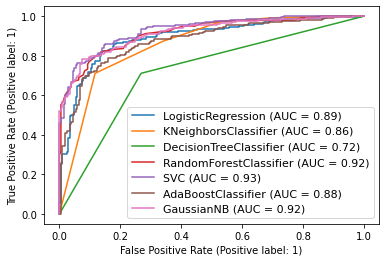

In [155]:
disp = plot_roc_curve(log, x_test, y_test)
plot_roc_curve(knn, x_test, y_test, ax = disp.ax_) # ax_ = Axes with confusion matrix
plot_roc_curve(decision_tree, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rfc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(svc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(abc, x_test, y_test, ax = disp.ax_)
plot_roc_curve(gnb, x_test, y_test, ax = disp.ax_)

plt.legend(prop = {'size':11}, loc = 'lower right')
plt.show()

In [156]:
# #we see that AdaBoostClassifier  is best model and also give highest accuracy 79.7% and least difference between accuracy and  cross validation

In [88]:
# Hyperparameter tunning the machine Learning Model

In [159]:
from sklearn.model_selection import GridSearchCV
grid_param={'n_estimators': range(0,20),
            'learning_rate': [0.1,0.01,0.001,0.0001,1],
            'algorithm':['SAMME', 'SAMME.R'],
            'random_state':range(0,20)}

In [160]:
grid_Search = GridSearchCV(estimator = AdaBoostClassifier(),param_grid = grid_param, cv = 5, n_jobs = -1)

In [161]:
grid_Search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.01, 0.001, 0.0001, 1],
                         'n_estimators': range(0, 20),
                         'random_state': range(0, 20)})

In [162]:
grid_Search.best_params_

{'algorithm': 'SAMME.R',
 'learning_rate': 1,
 'n_estimators': 19,
 'random_state': 0}

In [167]:
abc = grid_Search.best_estimator_

In [168]:
abc.score(x_train,y_train)

0.834942084942085

In [171]:
y_predict = abc.predict(x_test)

In [172]:
accuracy_score(y_test,y_predict)

0.795045045045045

In [173]:
print(confusion_matrix(y_test,y_predict))

[[164  41]
 [ 50 189]]


In [174]:
accuracy_score(y_test,y_predict)

0.795045045045045

In [ ]:
#After hyperparatmeter tunning of of AdaBoostClassifier is 79.5%

In [175]:
#Saving the model
import joblib 
joblib.dump(abc,'Automobile_insurance_fraud')

['Automobile_insurance_fraud']